# Warranty Cost Estimation

In [2]:
import pandas as pd
import datetime
import numpy as np
import reliability
from reliability.Fitters import *
from reliability.Probability_plotting import *
import matplotlib.pyplot as plt
from reliability.Distributions import *
import matplotlib.pyplot as plt
import seaborn as sns
from reliability.Other_functions import make_right_censored_data, histogram

KeyboardInterrupt: 

In [27]:
machines = pd.read_csv("machines.csv")
machines.head()

,Invoice Dealer Code,Serial Number,Product Line Code,Techtype Code,...,Vehicle Industry Description,Vehicle Industry Code,End Customer Name,End Customer Code
0,130000,NGAC00778,D,535211650,...,AGRICULTURE,418,1478589,1478589
1,130000,NGAC00786,D,535211650,...,AGRICULTURE,418,1478589,1478589
2,130000,NGAF05906,GR,542200130,...,NaN,#,#,#
3,130000,NGAF05915,GR,542200130,...,NaN,#,#,#
4,130000,NHAC00845,D,535221650,...,AGRICULTURE,418,1478589,1478589


In [4]:
import pandas as pd
claim = pd.read_csv("claims.csv",encoding= 'unicode_escape')
claim.head()
claim.to_csv('test_claim.csv')

In [29]:
cdata = pd.merge(machines, claim, on="Serial Number", how="outer", validate="one_to_many")
cdata.columns

Index(['Invoice Dealer Code_x', 'Serial Number', 'Product Line Code_x', 'Techtype Code_x', 'Model Key Code', 'Family Key_x', 'Engine Family Code_x', 'Engine Family Description_x',
       'Production Plant Code_x', 'Production Date_x', 'Invoice Date_x', 'Base Warranty Start Date_x', 'Extended Warranty Expire Date_x', 'End Customer Region Code', 'End Customer Postal Code',
       'End Customer City', 'Base Warranty Expire Date', 'Vehicle Industry Description', 'Vehicle Industry Code', 'End Customer Name', 'End Customer Code', 'Invoice Dealer Code_y',
       'Repair Dealer Code', 'Claim Number', 'Failure 13 Digits', 'Causal Part Code', 'Causal Part Descriprion', 'CNHi Failure Code', 'CNHi Failure Description', 'Product Component Code',
       'Product Component Description', 'Component Description', 'CNHi Component Code', 'Component Code', 'Component Description.1', 'Defect Code', 'Defect Description', 'Defect 5 Digits',
       'Product Line Code_y', 'Techtype Code_y', 'Model Key', 'Famil

In [30]:
df = cdata[['Serial Number', 'Product Line Code_x','Model Key Code', 'Family Key_x',
       'Engine Family Code_x', 'Engine Family Description_x','Warranty Type Code','Production Date_x', 'Invoice Date_x',
       'Base Warranty Start Date_x', 'Base Warranty Expire Date','Extended Warranty Expire Date_x','Failure Date','Vehicle Industry Description', 'Vehicle Industry Code',
          'Claim Number', 'Repair Started Date', 'Repair End Date',
       'Submission Date', 'Processing Date', 'Assessment Date', 'Payment Date','Component Description',
       'Years at Failure', 'Months at Failure','Worked Hours\ Mileage km','Total Amount with Dealer Net CCR Dollars']]

In [31]:
df.shape

(5548, 27)

In [32]:
df[['Invoice Date_x',
       'Base Warranty Start Date_x', 'Base Warranty Expire Date','Extended Warranty Expire Date_x','Failure Date']] = df[['Invoice Date_x',
       'Base Warranty Start Date_x', 'Base Warranty Expire Date','Extended Warranty Expire Date_x','Failure Date']].apply(pd.to_datetime)

C:\Users\t.rahul\Anaconda3\lib\site-packages\pandas\core\frame.py:3641: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [33]:
df["Total Amount with Dealer Net CCR Dollars"] = [float(str(i).replace(",", "")) for i in df["Total Amount with Dealer Net CCR Dollars"]]

C:\Users\TE3A6~1.RAH\AppData\Local\Temp/ipykernel_4220/2288029135.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Total Amount with Dealer Net CCR Dollars"] = [float(str(i).replace(",", "")) for i in df["Total Amount with Dealer Net CCR Dollars"]]


In [34]:
df['Months at Failure'] = df['Months at Failure'].replace(np.nan, 0)
df['Event'] = np.where(df['Months at Failure']==0, 0, 1)
df = df[df['Warranty Type Code']!="S"]
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2872 entries, 0 to 5547
Data columns (total 28 columns):
 #   Column                                    Non-Null Count  Dtype         
---  ------                                    --------------  -----         
 0   Serial Number                             2872 non-null   object        
 1   Product Line Code_x                       2867 non-null   object        
 2   Model Key Code                            2867 non-null   object        
 3   Family Key_x                              2867 non-null   object        
 4   Engine Family Code_x                      2867 non-null   float64       
 5   Engine Family Description_x               2867 non-null   object        
 6   Warranty Type Code                        2715 non-null   object        
 7   Production Date_x                         2643 non-null   object        
 8   Invoice Date_x                            2867 non-null   datetime64[ns]
 9   Base Warranty Start Date_x    

C:\Users\TE3A6~1.RAH\AppData\Local\Temp/ipykernel_4220/1283137593.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Months at Failure'] = df['Months at Failure'].replace(np.nan, 0)
C:\Users\TE3A6~1.RAH\AppData\Local\Temp/ipykernel_4220/1283137593.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Event'] = np.where(df['Months at Failure']==0, 0, 1)


# 1. Actual cost of 1st year standard warranty and failure frequency for each of the 2 model families

In [35]:
from IPython.display import display, HTML
for i in ['D','GR']:
    data = df[df['Product Line Code_x']==i]
    data = data[data['Months at Failure']<=12]
    data.to_csv(f"{i}_data.csv")
    n = len(data['Serial Number'].unique())
    f = len(data)
    d = 365
    MTBF = round((n*d)/f,1)
    FR = round(1/MTBF,2)
    FF = round(f/n,0)
    TCost = round(data["Total Amount with Dealer Net CCR Dollars"].sum(),3)
    UnitCost = round(TCost/n,3)
    print('MODEL FAMILY "{}"'.format(i))
    results = pd.DataFrame({'Number of Units':[n], 'Warranty Duration':[d], 'Number of Failures':[f], 'MTBF-Mean Time Between Failure':[MTBF],
                'Failure Rate':[FR], 'Failure Frequency':[FF], 'Total Actual Cost':[TCost], 'Unit Cost':[UnitCost]})
    display(HTML(results.to_html(index=False)))
    print('\n\n')


MODEL FAMILY "D"


Number of Units,Warranty Duration,Number of Failures,MTBF-Mean Time Between Failure,Failure Rate,Failure Frequency,Total Actual Cost,Unit Cost
112,365,667,61.3,0.02,6,373305,3333.08





MODEL FAMILY "GR"


Number of Units,Warranty Duration,Number of Failures,MTBF-Mean Time Between Failure,Failure Rate,Failure Frequency,Total Actual Cost,Unit Cost
462,365,1283,131.4,0.01,3,517521,1120.18


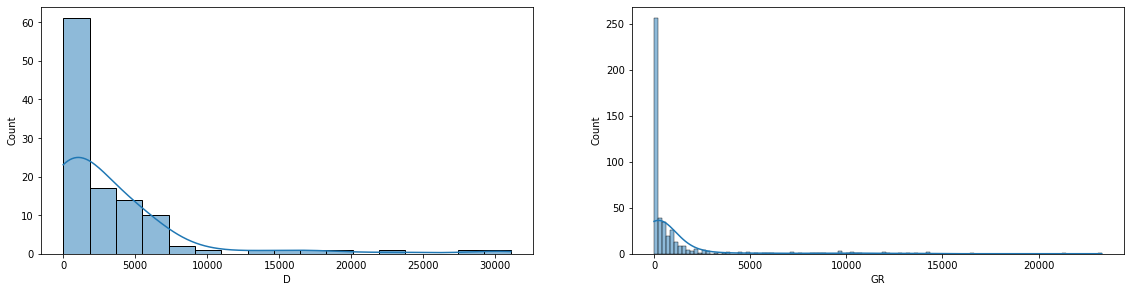

In [36]:
fig = plt.figure(figsize=(30,10))

a = 2  # number of rows
b = 3  # number of columns
c = 1  # initialize plot counter

for i in ['D','GR']:
    data = df[df['Product Line Code_x']==i]
    data = data[data['Months at Failure']<12.1]
    datag = data.groupby('Serial Number').agg({'Total Amount with Dealer Net CCR Dollars': ['sum'],'Event':['sum']}).reset_index() 
    datag.columns = ["Serial Number","Cost","Failures"]
    #datag = datag[datag["Cost"]!=0]
    plt.subplot(a, b, c)
    plt.xlabel(i)
    sns.histplot(data=datag['Cost'],kde=True)
    c = c+1
plt.show()

Results from Fit_Everything:
Analysis method: MLE
Failures / Right censored: 83/21 (20.19231% right censored) 

  Distribution   Alpha     Beta   Gamma      Mu   Sigma      Lambda  Log-likelihood    AICc     BIC      AD
Exponential_1P                                          0.000184248        -796.736 1595.51 1598.12 1.89277
    Weibull_2P 5318.78 0.847081                                            -794.569 1593.26 1598.43 1.12592
      Gamma_2P 5392.38  0.93161                                             -795.98 1596.08 1601.25 1.72954
Exponential_2P                  9.72963                 0.000184688        -796.549 1597.22 1602.39 1.99149
    Weibull_3P 5318.78 0.847081       0                                    -794.569 1595.38 1603.07 1.12592
      Gamma_3P 5392.38  0.93161       0                                     -795.98  1598.2 1605.89 1.72954
Loglogistic_2P 3095.38  1.16593                                            -798.954 1602.03  1607.2  1.3557
Loglogistic_3P 3095.38  

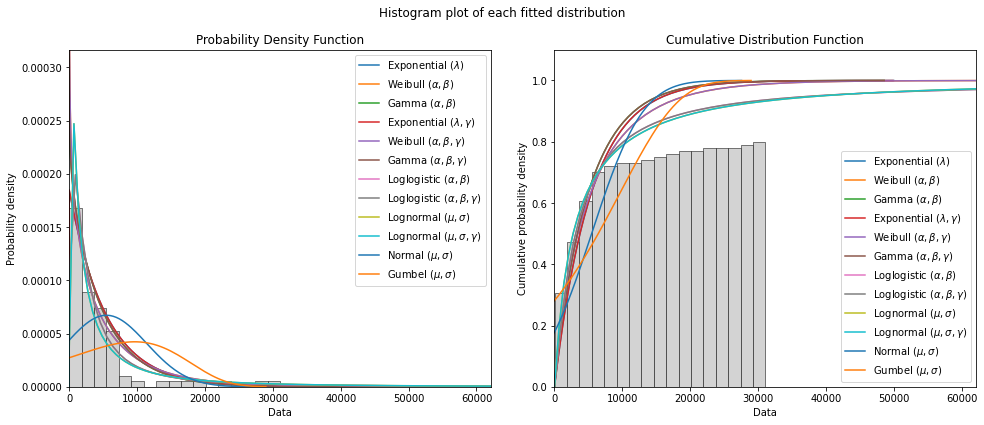

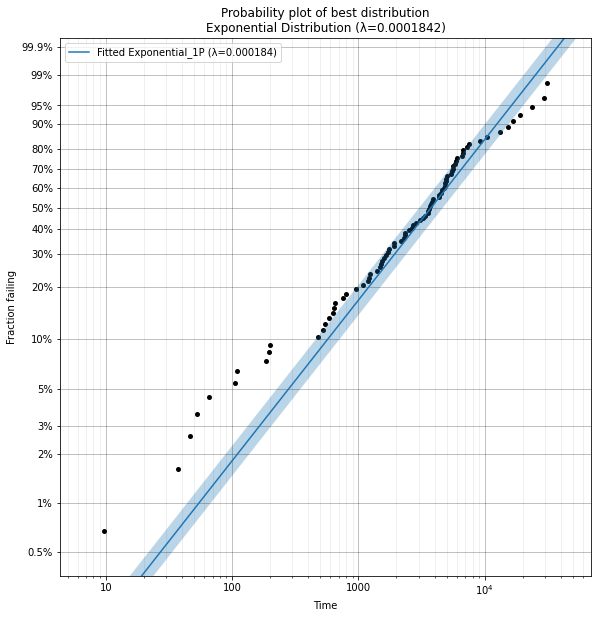

Results from Fit_Everything:
Analysis method: MLE
Failures / Right censored: 334/92 (21.59624% right censored) 

  Distribution   Alpha     Beta   Gamma      Mu   Sigma      Lambda  Log-likelihood    AICc     BIC      AD
Loglogistic_3P 593.835 0.702148 3.64855                                    -2720.46 5446.97 5459.08 2.28044
    Weibull_3P 1315.64 0.519151 3.64681                                    -2723.11 5452.27 5464.38 3.61818
      Gamma_3P 6791.21 0.386123 3.64855                                    -2727.17  5460.4 5472.51 6.20059
  Lognormal_3P                  3.05774 6.32078 2.32529                    -2729.71 5465.48 5477.59 1.88843
  Lognormal_2P                          6.35941 2.19117                    -2733.63 5471.28 5479.36 1.85618
Loglogistic_2P 568.948 0.808019                                            -2740.55 5485.13 5493.21 2.46722
    Weibull_2P  1310.6 0.616297                                            -2757.28 5518.58 5526.66 9.14794
      Gamma_2P 6099.43 

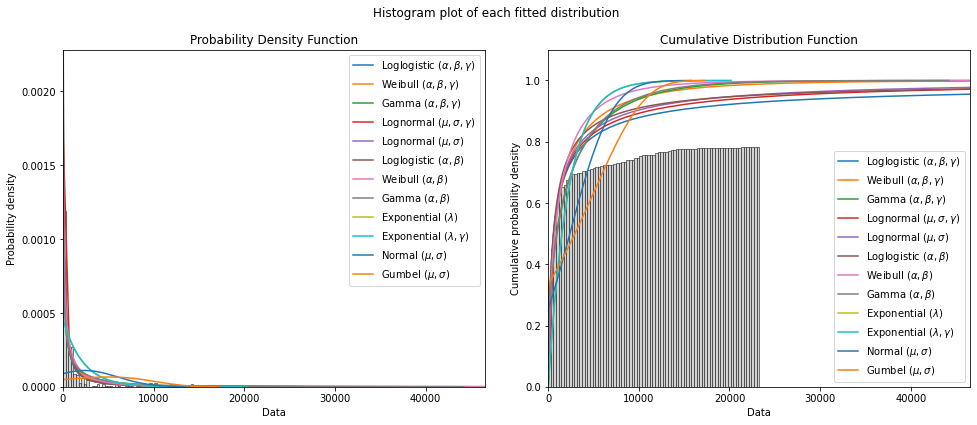

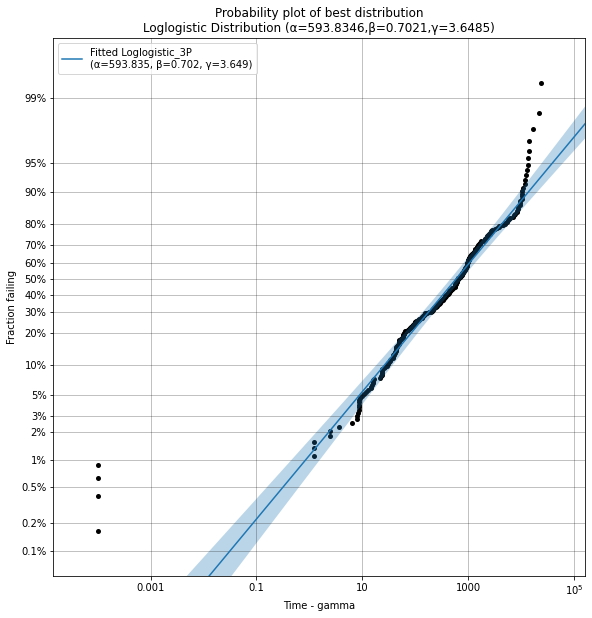

In [37]:
from IPython.display import display, HTML
ProductFamily = []
Mean = []
for i in ['D','GR']:
    data = df[df['Product Line Code_x']==i]
    data = data[data['Months at Failure']<12.1]
    datag = data.groupby('Serial Number').agg({'Total Amount with Dealer Net CCR Dollars': ['sum'],'Event':['sum']}).reset_index() 
    datag.columns = ["Serial Number","Cost","Failures"]
    fraction = len(datag[datag["Cost"]==0])/len(datag)
    datag = datag[datag["Cost"]!=0]
    data_cen = make_right_censored_data(np.array(datag['Cost']), fraction_censored=fraction, seed=0)
    output = Fit_Everything(failures=datag['Cost'].dropna().tolist(), right_censored=data_cen.right_censored, show_probability_plot=False, show_PP_plot=False)
    mean = output.best_distribution.mean
    ProductFamily.append(i)
    Mean.append(mean)

In [38]:
results = pd.DataFrame({'Product Family':ProductFamily, 'Unit Cost':Mean})
print('\n')
display(HTML(results.to_html(index=False)))
print('\n')

Product Family,Unit Cost
D,5427.48
GR,no mean when $\beta \leq 1$


# 2. Estimate of 2nd year cost (13 to 24 months in service) for a potential extended warranty FULL (= to standard warranty first year coverage) on a deal of 50 units for models “865” 

In [39]:
data = df[df['Model Key Code'].str.startswith('865', na=False)]
#data = data[data['Months at Failure'].between(13, 24)]
data = data[data['Months at Failure'].between(0, 24)]
data = data[~data['Months at Failure'].between(1, 12) ]
data = data[(data['Invoice Date_x'] < '2019-09-01')]
data.shape

(131, 28)

In [40]:
reliability.__version__

'0.5.7'

In [41]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 131 entries, 18 to 4001
Data columns (total 28 columns):
 #   Column                                    Non-Null Count  Dtype         
---  ------                                    --------------  -----         
 0   Serial Number                             131 non-null    object        
 1   Product Line Code_x                       131 non-null    object        
 2   Model Key Code                            131 non-null    object        
 3   Family Key_x                              131 non-null    object        
 4   Engine Family Code_x                      131 non-null    float64       
 5   Engine Family Description_x               131 non-null    object        
 6   Warranty Type Code                        118 non-null    object        
 7   Production Date_x                         129 non-null    object        
 8   Invoice Date_x                            131 non-null    datetime64[ns]
 9   Base Warranty Start Date_x    

In [42]:
n = len(data['Serial Number'].unique())
f = data['Event'].sum()
d = 365
MTBF = round((n*d)/f,1)
FR = round(1/MTBF,2)
FF = round(f/n,0)
TCost = round(data["Total Amount with Dealer Net CCR Dollars"].sum(),3)
UnitCost = round(TCost/n,3)
results = pd.DataFrame({'Number of Units':[n], 'Warranty Duration':[d], 'Number of Failures':[f], 'Mean Time Between Failure':[MTBF],
                'Failure Rate':[FR], 'Failure Frequency':[FF], 'Total Actual Cost':[TCost], 'Unit Cost':[UnitCost]})
results

,Number of Units,Warranty Duration,Number of Failures,Mean Time Between Failure,Failure Rate,Failure Frequency,Total Actual Cost,Unit Cost
0,55,365,118,170.1,0.01,2,69635,1266.09


In [43]:
datag = data.groupby('Serial Number').agg({'Total Amount with Dealer Net CCR Dollars': ['sum'],'Event':['sum']}).reset_index() 
datag.columns = ["Serial Number","Cost","Failures"]
fraction = len(datag[datag["Cost"]==0])/len(datag)
datag = datag[datag["Cost"]!=0]
data_cen = make_right_censored_data(np.array(datag['Cost']), fraction_censored=fraction, seed=0)
datag.Cost.describe()

count        42
mean    1657.98
std     3479.59
min     9.72973
25%     199.683
50%     330.938
75%     1564.63
max     21097.5
Name: Cost, dtype: float64

In [44]:
fraction

0.23636363636363636

In [45]:
len(datag['Cost'])

42

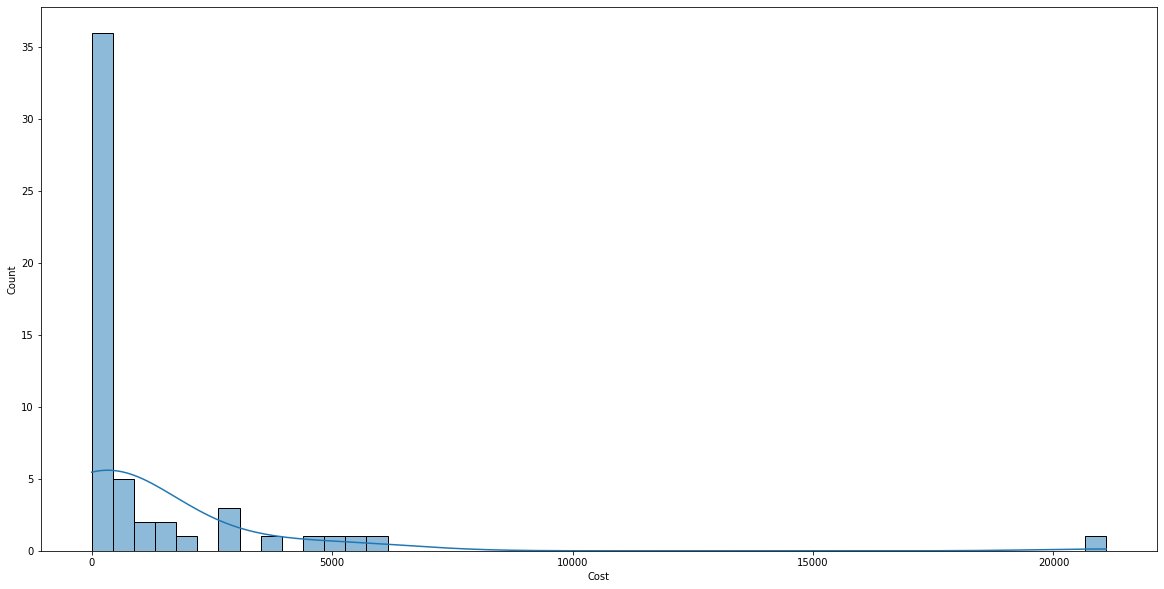

In [46]:
fig = plt.figure(figsize=(20,10))
datag = data.groupby('Serial Number').agg({'Total Amount with Dealer Net CCR Dollars': ['sum'],'Event':['sum']}).reset_index() 
datag.columns = ["Serial Number","Cost","Failures"]
#datag = datag[datag["Cost"]!=0]
sns.histplot(data=datag['Cost'],kde=True)
plt.show()

In [47]:
print(len(datag['Cost'].dropna().tolist()))

55


In [48]:
len(datag['Cost'])

55

Results from Fit_Everything:
Analysis method: MLE
Failures / Right censored: 42/9 (17.64706% right censored) 

  Distribution   Alpha     Beta   Gamma      Mu   Sigma      Lambda  Log-likelihood    AICc     BIC      AD
    Weibull_3P 1326.61 0.598629 9.72963                                    -346.003 698.518 703.802 1.65855
      Gamma_3P 4711.48 0.456465 9.72963                                    -346.491 699.494 704.778 1.80727
  Lognormal_2P                          6.52964 1.68581                     -348.71  701.67 705.283 1.21264
Loglogistic_2P 677.712   1.0034                                            -349.663 703.576  707.19 1.27726
Loglogistic_3P 634.008 0.883577 9.72873                                    -348.139 702.788 708.073 1.23538
  Lognormal_3P                   2.9454 6.51494 1.71941                    -348.665 703.841 709.125 1.18498
    Weibull_2P 1405.61 0.733415                                            -352.115  708.48 712.094 2.20834
      Gamma_2P 3387.52 0.

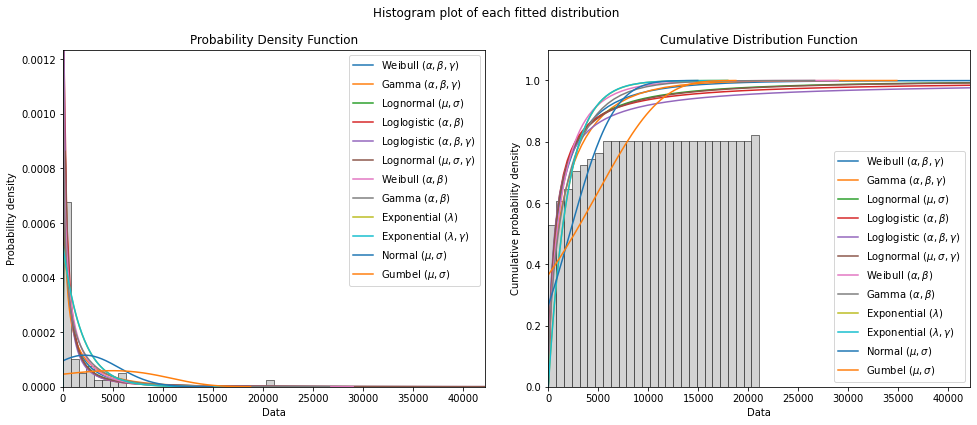

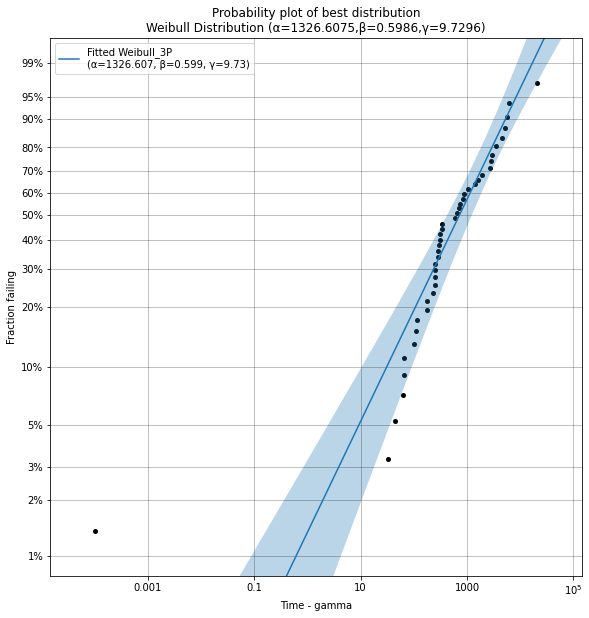

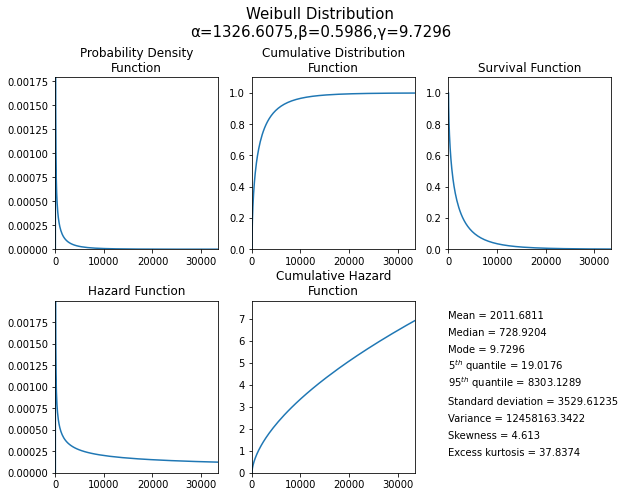

In [49]:
# Fit all probability distributions available from 'reliability' library
output = Fit_Everything(failures=datag['Cost'].dropna().tolist(), right_censored=data_cen.right_censored, show_probability_plot=False, show_PP_plot=False)

# Define the probability distribution that best fitted the failure times for the given component
output.best_distribution.plot()

In [50]:
print(output.results)

      Distribution   Alpha     Beta   Gamma  ... Log-likelihood    AICc     BIC      AD
0       Weibull_3P 1326.61 0.598629 9.72963  ...       -346.003 698.518 703.802 1.65855
1         Gamma_3P 4711.48 0.456465 9.72963  ...       -346.491 699.494 704.778 1.80727
5     Lognormal_2P                           ...        -348.71  701.67 705.283 1.21264
10  Loglogistic_2P 677.712   1.0034          ...       -349.663 703.576  707.19 1.27726
11  Loglogistic_3P 634.008 0.883577 9.72873  ...       -348.139 702.788 708.073 1.23538
3     Lognormal_3P                   2.9454  ...       -348.665 703.841 709.125 1.18498
7       Weibull_2P 1405.61 0.733415          ...       -352.115  708.48 712.094 2.20834
8         Gamma_2P 3387.52 0.578885          ...       -353.344 710.937 714.551 2.18793
9   Exponential_1P                           ...       -360.277 722.635 724.485 6.53761
2   Exponential_2P                  9.72963  ...       -360.022 724.294 727.908 6.87778
4        Normal_2P              

In [51]:
output.results.iloc[0][0]

'Weibull_3P'

In [52]:
dist_name = output.results.iloc[0][0]
param = output.results.iloc[0][1:7]
param.columns = ['value']
param = param.to_frame()
param.columns = ['value']
param.value = pd.to_numeric(param.value)
param.value = param.value.fillna(0)
param

,value
Alpha,1326.61
Beta,0.598629
Gamma,9.72963
Mu,0
Sigma,0
Lambda,0


In [53]:
if "Weibull" in dist_name:
    print("Weibull_Distribution")
    dist = Weibull_Distribution(alpha=param.iloc[0],beta=param.iloc[1],gamma=param.iloc[2])
elif "Exponential" in dist_name:
    print("Exponential_Distribution")
    dist = Exponential_Distribution(Lambda=param.iloc[5], gamma=param.iloc[2])
elif "Normal" in dist_name:
    print("Normal_Distribution")
    dist = Normal_Distribution(mu=param.iloc[3],sigma=param.iloc[4])
elif "Lognormal" in dist_name:
    print("Lognormal_Distribution")
    dist = Lognormal_Distribution(mu=param.iloc[3], sigma=param.iloc[4], gamma=param.iloc[2])
elif "Gamma" in dist_name:
    print("Gamma_Distribution")
    dist = Gamma_Distribution(alpha=param.iloc[0],beta=param.iloc[1],gamma=param.iloc[2])
elif "Beta" in dist_name:
    print("Beta_Distribution")
    dist = Beta_Distribution(alpha=param.iloc[0],beta=param.iloc[1])
elif "Loglogistic" in dist_name:
    print("Loglogistic_Distribution")
    dist = Loglogistic_Distribution(alpha=param.iloc[0],beta=param.iloc[1],gamma=param.iloc[2])
elif "Gumbel" in dist_name:
    print("Gumbel_Distribution")
    dist = Gumbel_Distribution(mu=param.iloc[3],sigma=param.iloc[4])
else:
    print("Distribution not Found!")

Weibull_Distribution


In [54]:
dist_name, dist

('Weibull_3P',
 <reliability.Distributions.Weibull_Distribution at 0x238e43b3190>)

In [55]:
means = []
percentile95 = []
i = 0
while(i<100):
    sample = dist.random_samples(50)
    output = Fit_Weibull_3P(failures=sample,show_probability_plot=False,print_results=False)
    means.append(output.distribution.mean)
    percentile95.append(output.distribution.b95)
    i+=1
sim = pd.DataFrame({'means':means,'percentile95':percentile95})

In [56]:
sim

,means,percentile95
0,1941.51,7113.23
1,2042.26,9219.64
2,2404.32,9000.43
3,1708.37,7110.31
4,2034.11,7854.54
5,1531.08,6640.79
6,1873.33,7484.64
7,1779.06,7044.62
8,2858.09,12484.1
9,2006.02,7877.09


In [57]:
sim.means.mean()

2123.588351021177

Results from Fit_Everything:
Analysis method: MLE
Failures / Right censored: 100/0 (0% right censored) 

  Distribution   Alpha    Beta   Gamma      Mu    Sigma      Lambda  Log-likelihood    AICc     BIC       AD
      Gamma_2P  151.42 14.0245                                              -773.52 1551.16 1556.25 0.540376
  Lognormal_2P                         7.62479 0.270318                    -773.565 1551.25 1556.34  0.50363
Loglogistic_2P 2054.52 6.58234                                             -773.731 1551.59 1556.67 0.356312
      Gamma_3P 204.504 7.97559 492.581                                     -773.438 1553.13 1560.69 0.524555
  Lognormal_3P                       0 7.62479 0.270318                    -773.565 1553.38 1560.95  0.50363
    Weibull_3P 1355.64 2.19729 921.586                                     -773.614 1553.48 1561.04   0.7162
Loglogistic_3P 2054.52 6.58234       0                                     -773.731 1553.71 1561.28 0.356312
     Normal_2P         

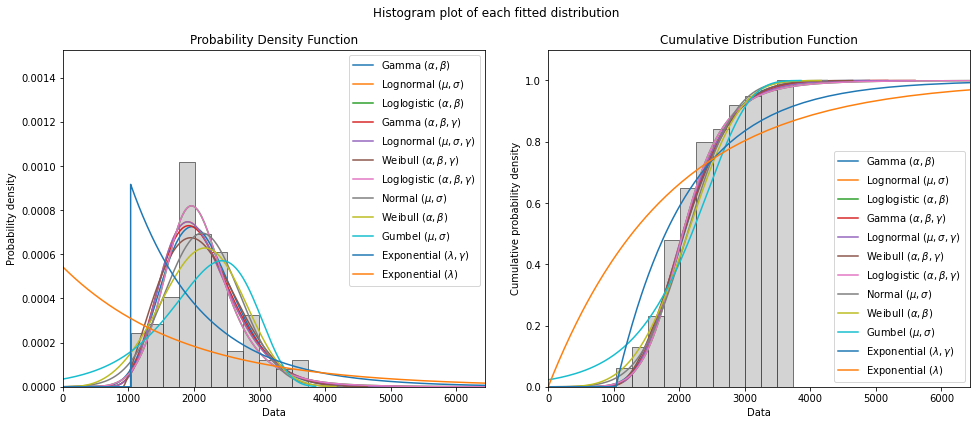

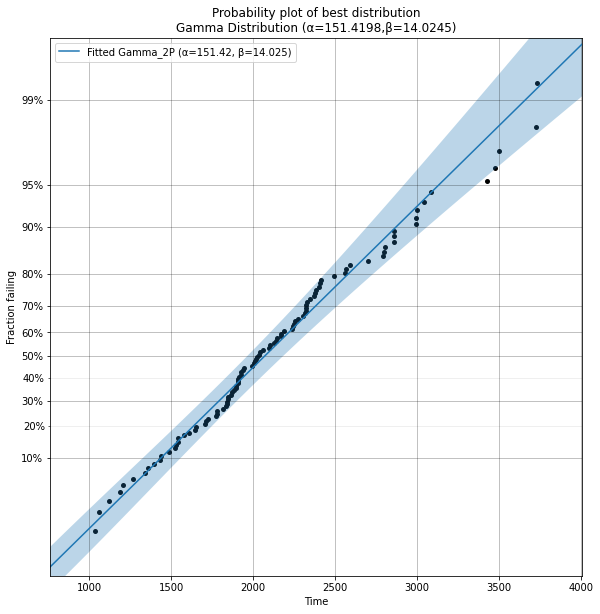

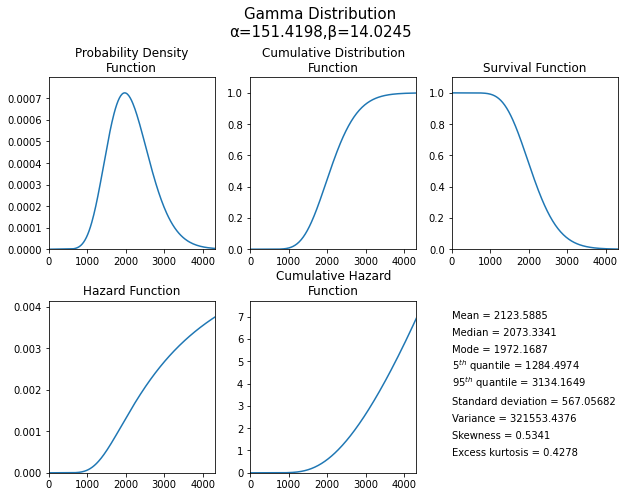

In [58]:
# Fit all probability distributions available from 'reliability' library
output = Fit_Everything(failures=sim['means'].dropna().tolist(), show_probability_plot=False, show_PP_plot=False)

# Define the probability distribution that best fitted the failure times for the given component
output.best_distribution.plot()

In [59]:
output.best_distribution.mean

2123.588544226196

# 3. Estimate of a contract for additional 4 years (13 to 60 months in service) extended warranty FULL (= to standard warranty first year coverage) for models “2050” for both 2 units and 20 units

In [60]:
data = df[df['Model Key Code'].str.startswith('2050', na=False)]
data = data[data['Months at Failure'].between(0, 60)]
data = data[~data['Months at Failure'].between(1, 12) ]
#data = data[(data['Invoice Date_x'] < '2016-09-01')]
data.shape

(381, 28)

In [61]:
data['Months at Failure'].describe()

count       381
mean    15.7698
std     7.67418
min           0
25%        13.4
50%        16.3
75%        20.4
max        33.8
Name: Months at Failure, dtype: float64

In [62]:
n = len(data['Serial Number'].unique())
f = data['Event'].sum()
d = 4*365
MTBF = round((n*d)/f,1)
FR = round(1/MTBF,4)
FF = round(f/n,0)
TCost = round(data["Total Amount with Dealer Net CCR Dollars"].sum(),3)
UnitCost = round(TCost/n,3)
results = pd.DataFrame({'Number of Units':[n], 'Warranty Duration':[d], 'Number of Failures':[f], 'Mean Time Between Failure':[MTBF],
                'Failure Rate':[FR], 'Failure Frequency':[FF], 'Total Actual Cost':[TCost], 'Unit Cost':[UnitCost]})
results

,Number of Units,Warranty Duration,Number of Failures,Mean Time Between Failure,Failure Rate,Failure Frequency,Total Actual Cost,Unit Cost
0,79,1460,352,327.7,0.0031,4,479639,6071.38


In [63]:
datag = data.groupby('Serial Number').agg({'Total Amount with Dealer Net CCR Dollars': ['sum'],'Event':['sum']}).reset_index() 
datag.columns = ["Serial Number","Cost","Failures"]
fraction = len(datag[datag["Cost"]==0])/len(datag)
datag = datag[datag["Cost"]!=0]
data_cen = make_right_censored_data(np.array(datag['Cost']), fraction_censored=fraction, seed=0)
datag.Cost.describe()

count        58
mean    8269.63
std     9123.49
min     46.9181
25%     1811.67
50%     5623.87
75%     10335.9
max     43241.7
Name: Cost, dtype: float64

In [64]:
fraction

0.26582278481012656

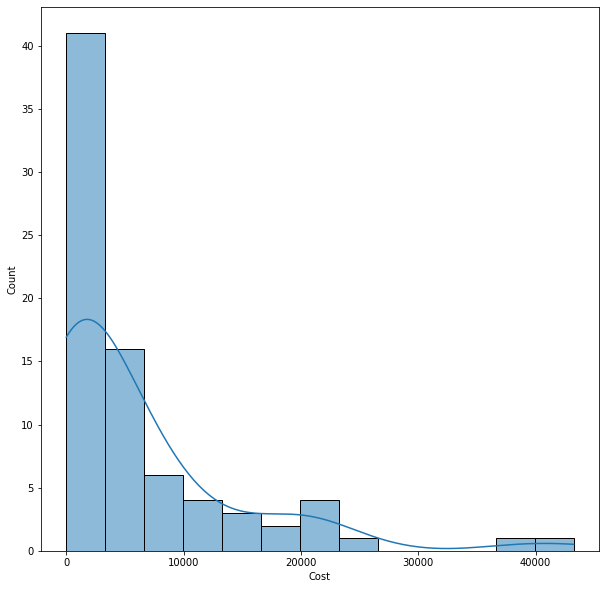

In [65]:
fig = plt.figure(figsize=(10,10))
datag = data.groupby('Serial Number').agg({'Total Amount with Dealer Net CCR Dollars': ['sum'],'Event':['sum']}).reset_index() 
datag.columns = ["Serial Number","Cost","Failures"]
#datag = datag[datag["Cost"]!=0]
sns.histplot(data=datag['Cost'],kde=True)
plt.show()

Results from Fit_Everything:
Analysis method: MLE
Failures / Right censored: 58/15 (20.54795% right censored) 

  Distribution   Alpha     Beta  Gamma      Mu   Sigma      Lambda  Log-likelihood    AICc     BIC      AD
      Gamma_3P   15102 0.686646 46.918                                    -592.601 1191.55 1198.07 2.22676
    Weibull_3P 10968.8 0.732286 46.918                                    -593.694 1193.74 1200.26  1.7101
Exponential_1P                                          8.9446e-05        -598.669 1199.39 1201.63 1.88107
      Gamma_2P 14955.9 0.790699                                           -597.728 1199.63 1204.04 1.44272
    Weibull_2P 11051.7 0.870495                                            -597.74 1199.65 1204.06 1.43706
Exponential_2P                  46.918                 8.99379e-05        -598.362 1200.89  1205.3 2.09912
Loglogistic_2P 5941.82   1.1548                                           -600.551 1205.27 1209.68 1.76407
  Lognormal_2P                  

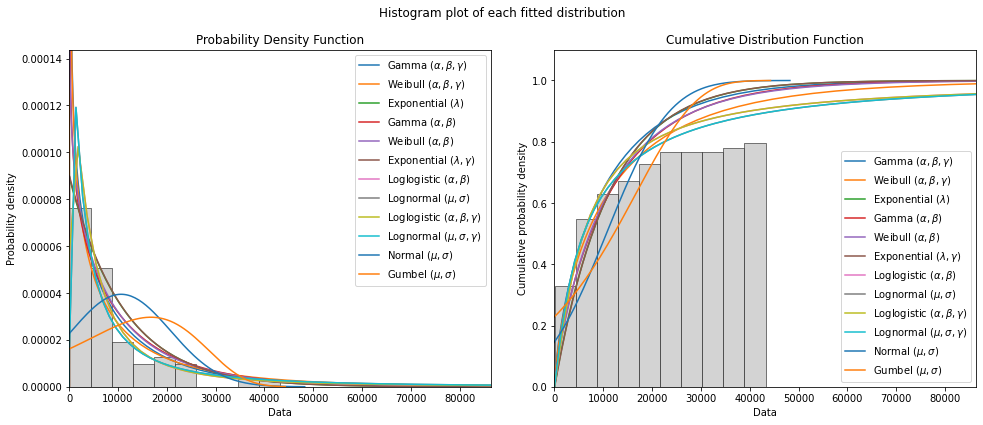

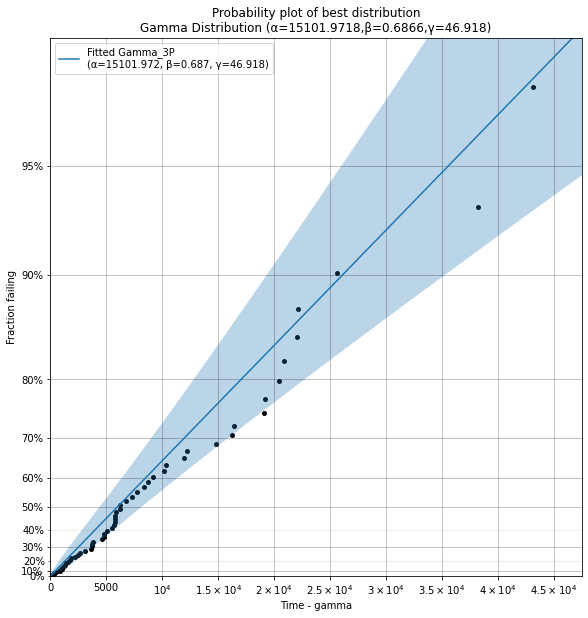

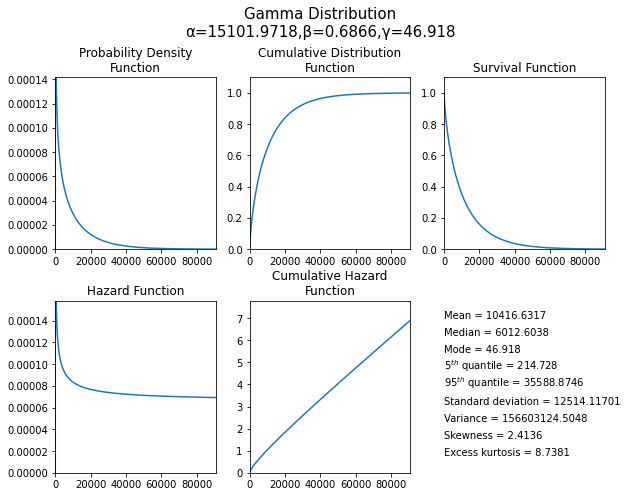

In [66]:
# Fit all probability distributions available from 'reliability' library
output = Fit_Everything(failures=datag['Cost'].dropna().tolist(), right_censored=data_cen.right_censored, show_probability_plot=False, show_PP_plot=False)

# Define the probability distribution that best fitted the failure times for the given component
output.best_distribution.plot()

In [67]:
output.results.iloc[0][0]

'Gamma_3P'

In [68]:
#dist_name = output.results.iloc[0][0]
dist_name = output.results.iloc[0][0]
param = output.results.iloc[0][1:7]
param.columns = ['value']
param = param.to_frame()
param.columns = ['value']
param.value = pd.to_numeric(param.value)
param.value = param.value.fillna(0)
param

,value
Alpha,15102
Beta,0.686646
Gamma,46.918
Mu,0
Sigma,0
Lambda,0


In [69]:
if "Weibull" in dist_name:
    print("Weibull_Distribution")
    dist = Weibull_Distribution(alpha=param.iloc[0],beta=param.iloc[1],gamma=param.iloc[2])
elif "Exponential" in dist_name:
    print("Exponential_Distribution")
    dist = Exponential_Distribution(Lambda=param.iloc[5], gamma=param.iloc[2])
elif "Normal" in dist_name:
    print("Normal_Distribution")
    dist = Normal_Distribution(mu=param.iloc[3],sigma=param.iloc[4])
elif "Lognormal" in dist_name:
    print("Lognormal_Distribution")
    dist = Lognormal_Distribution(mu=param.iloc[3], sigma=param.iloc[4], gamma=param.iloc[2])
elif "Gamma" in dist_name:
    print("Gamma_Distribution")
    dist = Gamma_Distribution(alpha=param.iloc[0],beta=param.iloc[1],gamma=param.iloc[2])
elif "Beta" in dist_name:
    print("Beta_Distribution")
    dist = Beta_Distribution(alpha=param.iloc[0],beta=param.iloc[1])
elif "Loglogistic" in dist_name:
    print("Loglogistic_Distribution")
    dist = Loglogistic_Distribution(alpha=param.iloc[0],beta=param.iloc[1],gamma=param.iloc[2])
elif "Gumbel" in dist_name:
    print("Gumbel_Distribution")
    dist = Gumbel_Distribution(mu=param.iloc[3],sigma=param.iloc[4])
else:
    print("Distribution not Found!")

Gamma_Distribution


In [70]:
dist_name, dist

('Gamma_3P', <reliability.Distributions.Gamma_Distribution at 0x238e48cd5b0>)

# Deal size of 2 units

In [71]:
output.results.iloc[2][0]

'Exponential_1P'

In [72]:
output.results.iloc[2][1:7]

Alpha              
Beta               
Gamma              
Mu                 
Sigma              
Lambda   8.9446e-05
Name: 9, dtype: object

In [73]:
means = []
percentile95 = []
i = 0
while(i<100):
    sample = Exponential_Distribution(Lambda=8.9446e-05, gamma=param.iloc[2]).random_samples(2)
    output = Fit_Exponential_1P(failures=sample,show_probability_plot=False,print_results=False)
    means.append(output.distribution.mean)
    percentile95.append(output.distribution.b95)
    i+=1
sim = pd.DataFrame({'means':means,'percentile95':percentile95})

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [ ]:
sim

In [ ]:
sim.means.mean()

In [ ]:
# Fit all probability distributions available from 'reliability' library
output1 = Fit_Everything(failures=sim['means'].dropna().tolist(), show_probability_plot=False, show_PP_plot=False)

# Define the probability distribution that best fitted the failure times for the given component
output1.best_distribution.plot()

In [ ]:
output1.best_distribution.mean

# Deal size of 20 units

In [815]:
means = []
percentile95 = []
i = 0
while(i<100):
    sample = dist.random_samples(20)
    output = Fit_Gamma_3P(failures=sample,show_probability_plot=False,print_results=False)
    means.append(output.distribution.mean)
    percentile95.append(output.distribution.b95)
    i+=1
sim = pd.DataFrame({'means':means,'percentile95':percentile95})

In [816]:
sim.means.mean()

9196.464883510213

Results from Fit_Everything:
Analysis method: MLE
Failures / Right censored: 100/0 (0% right censored) 

   Distribution   Alpha    Beta   Gamma      Mu   Sigma      Lambda  Log-likelihood    AICc     BIC       AD
       Gamma_2P  840.19 10.9457                                            -931.789  1867.7 1872.79 0.287583
   Lognormal_2P                         9.08024 0.30749                    -931.985 1868.09 1873.18 0.295275
 Loglogistic_2P 8779.72 5.64887                                            -933.417 1870.96 1876.04 0.365533
     Weibull_3P 6277.75 2.07867 3631.98                                    -931.239 1868.73 1876.29 0.300164
       Gamma_3P 1184.14 5.92494  2192.6                                     -931.64 1869.53  1877.1 0.263082
   Lognormal_3P                       0 9.08024 0.30749                    -931.985 1870.22 1877.79 0.295275
      Normal_2P                         9196.46 2819.48                     -935.63 1875.38 1880.47  0.82952
 Loglogistic_3P 8779.72

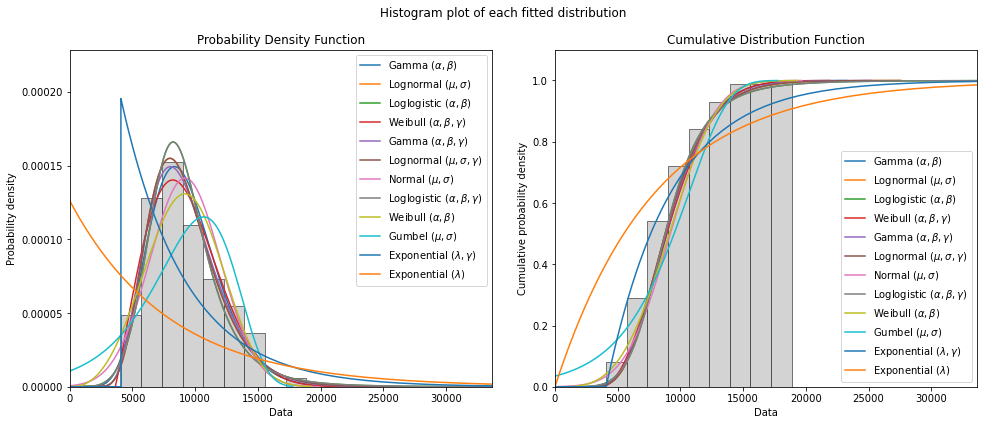

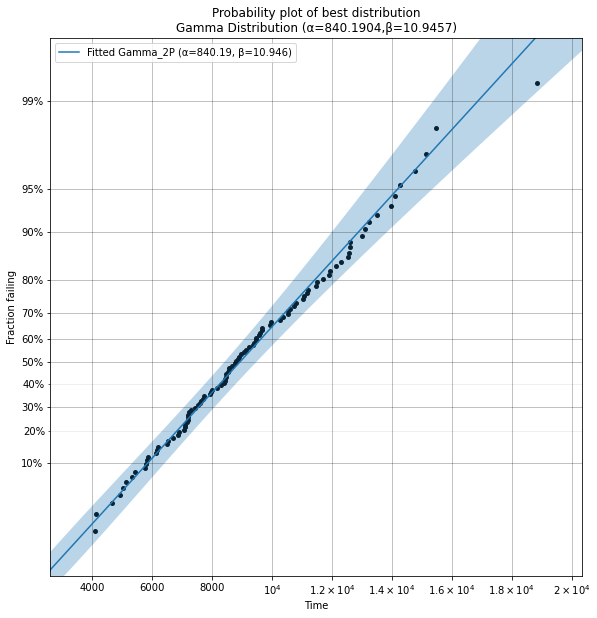

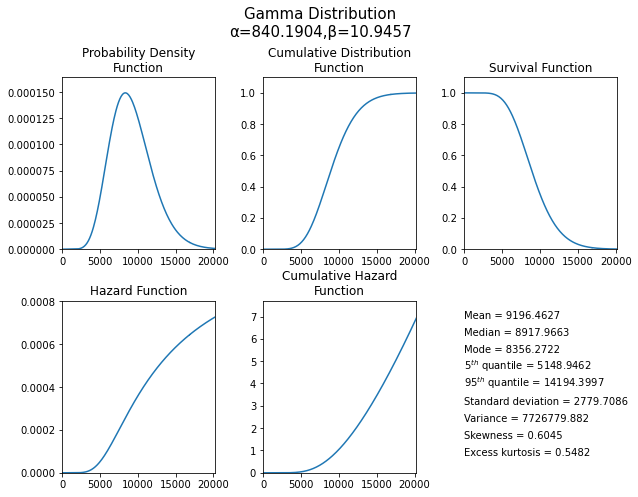

In [817]:
# Fit all probability distributions available from 'reliability' library
output2 = Fit_Everything(failures=sim['means'].dropna().tolist(), show_probability_plot=False, show_PP_plot=False)

# Define the probability distribution that best fitted the failure times for the given component
output2.best_distribution.plot()

In [818]:
output2.best_distribution.mean

9196.462654955054

# 4. Estimate of a contract for additional 4 years (13 to 60 months in service) extended warranty FULL (= to standard warranty first year coverage) for models “2050” for both 2 units and 20 units, but coverage limited to POWERTRAIN* only - Engine + Turbo + Transmission components

In [849]:
data = df[df['Model Key Code'].str.startswith('2050', na=False)]
data = data[data['Component Description'].str.contains("transmission", na=False) | data['Component Description'].str.contains("Engine", na=False) | data['Component Description'].str.contains("Turbo", na=False)]
data = data[data['Months at Failure'].between(0, 60)]
data = data[~data['Months at Failure'].between(1, 12) ]
#data = data[(data['Invoice Date_x'] < '2016-09-01')]
data.shape

(24, 28)

In [850]:
n = len(data['Serial Number'].unique())
f = data['Event'].sum()
d = 4*365
MTBF = round((n*d)/f,1)
FR = round(1/MTBF,4)
FF = round(f/n,0)
TCost = round(data["Total Amount with Dealer Net CCR Dollars"].sum(),3)
UnitCost = round(TCost/n,3)
results = pd.DataFrame({'Number of Units':[n], 'Warranty Duration':[d], 'Number of Failures':[f], 'Mean Time Between Failure':[MTBF],
                'Failure Rate':[FR], 'Failure Frequency':[FF], 'Total Actual Cost':[TCost], 'Unit Cost':[UnitCost]})
results

,Number of Units,Warranty Duration,Number of Failures,Mean Time Between Failure,Failure Rate,Failure Frequency,Total Actual Cost,Unit Cost
0,20,1460,23,1269.6,0.0008,1,114534,5726.71


In [851]:
datag = data.groupby('Serial Number').agg({'Total Amount with Dealer Net CCR Dollars': ['sum'],'Event':['sum']}).reset_index() 
datag.columns = ["Serial Number","Cost","Failures"]
datag = datag[datag["Cost"]!=0]
#data_cen = make_right_censored_data(np.array(datag['Cost']), threshold=threshold)
datag.Cost.describe()

count        20
mean    5726.71
std     5830.68
min     10.9459
25%     212.248
50%      3485.5
75%     11167.4
max     15475.4
Name: Cost, dtype: float64

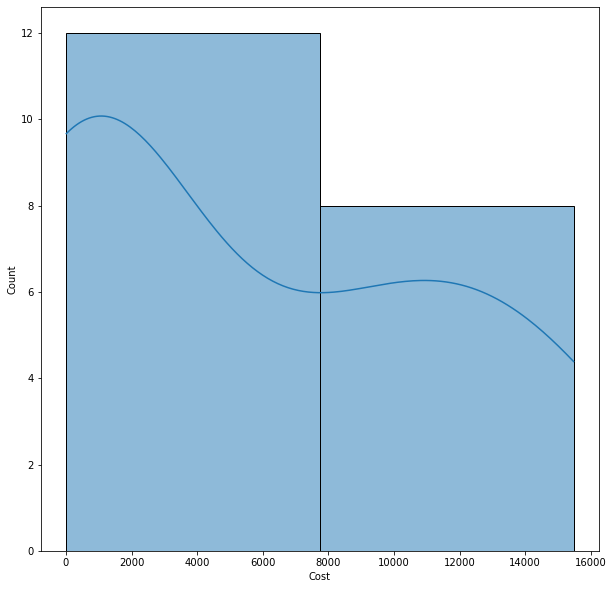

In [858]:
fig = plt.figure(figsize=(10,10))
datag = data.groupby('Serial Number').agg({'Total Amount with Dealer Net CCR Dollars': ['sum'],'Event':['sum']}).reset_index() 
datag.columns = ["Serial Number","Cost","Failures"]
#datag = datag[datag["Cost"]!=0]
sns.histplot(data=datag['Cost'],bins=2, kde=True)
plt.show()

Results from Fit_Everything:
Analysis method: MLE
Failures / Right censored: 20/0 (0% right censored) 

   Distribution   Alpha     Beta   Gamma      Mu   Sigma      Lambda  Log-likelihood    AICc     BIC      AD
       Gamma_3P 28186.4  0.28373 10.9458                                    -178.897 365.294 366.781 1.28709
     Weibull_3P 5079.56 0.447413 10.9458                                    -181.337 370.174 371.661 1.20985
 Loglogistic_3P 1777.15 0.519953 10.9458                                    -185.062 377.623  379.11 1.39829
     Weibull_2P 4014.49 0.567979                                            -187.725 380.155 381.441 1.63895
       Gamma_2P 26058.5   0.3492                                            -187.729 380.163 381.449 1.06469
   Lognormal_3P                  10.9458 6.53431  4.2742                    -188.117 383.734 385.221 2.26016
   Lognormal_2P                          7.18963 2.41446                    -189.801 384.307 385.593 1.73289
 Loglogistic_2P 1325.61 

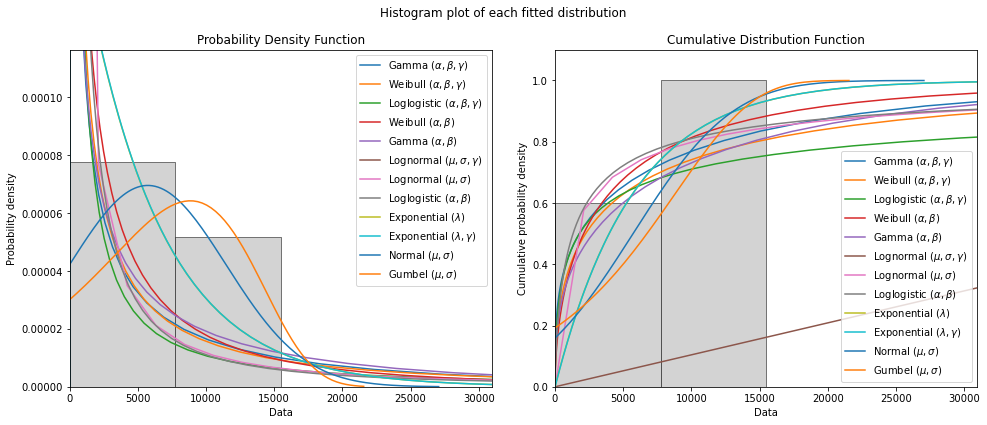

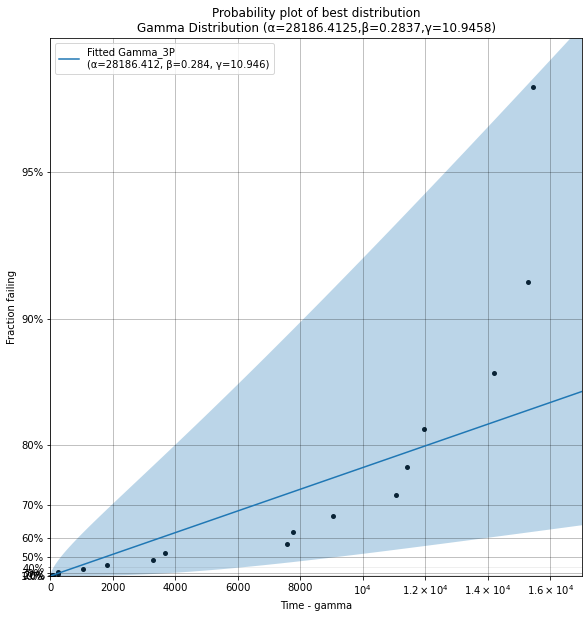

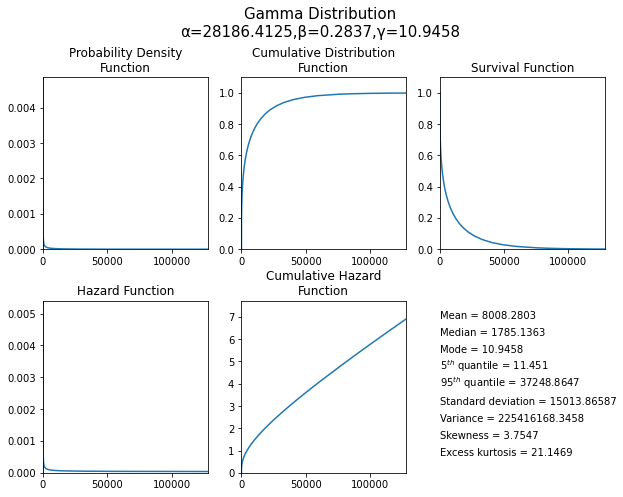

In [853]:
# Fit all probability distributions available from 'reliability' library
output = Fit_Everything(failures=datag['Cost'].dropna().tolist(), show_probability_plot=False, show_PP_plot=False)


# Define the probability distribution that best fitted the failure times for the given component
output.best_distribution.plot()

In [830]:
dist_name = output.results.iloc[0][0]
param = output.results.iloc[0][1:7]
param.columns = ['value']
param = param.to_frame()
param.columns = ['value']
param.value = pd.to_numeric(param.value)
param.value = param.value.fillna(0)
param

,value
Alpha,28186.4
Beta,0.28373
Gamma,10.9458
Mu,0
Sigma,0
Lambda,0


In [831]:
if "Weibull" in dist_name:
    print("Weibull_Distribution")
    dist = Weibull_Distribution(alpha=param.iloc[0],beta=param.iloc[1],gamma=param.iloc[2])
elif "Exponential" in dist_name:
    print("Exponential_Distribution")
    dist = Exponential_Distribution(Lambda=param.iloc[5], gamma=param.iloc[2])
elif "Normal" in dist_name:
    print("Normal_Distribution")
    dist = Normal_Distribution(mu=param.iloc[3],sigma=param.iloc[4])
elif "Lognormal" in dist_name:
    print("Lognormal_Distribution")
    dist = Lognormal_Distribution(mu=param.iloc[3], sigma=param.iloc[4], gamma=param.iloc[2])
elif "Gamma" in dist_name:
    print("Gamma_Distribution")
    dist = Gamma_Distribution(alpha=param.iloc[0],beta=param.iloc[1],gamma=param.iloc[2])
elif "Beta" in dist_name:
    print("Beta_Distribution")
    dist = Beta_Distribution(alpha=param.iloc[0],beta=param.iloc[1])
elif "Loglogistic" in dist_name:
    print("Loglogistic_Distribution")
    dist = Loglogistic_Distribution(alpha=param.iloc[0],beta=param.iloc[1],gamma=param.iloc[2])
elif "Gumbel" in dist_name:
    print("Gumbel_Distribution")
    dist = Gumbel_Distribution(mu=param.iloc[3],sigma=param.iloc[4])
else:
    print("Distribution not Found!")

Gamma_Distribution


In [832]:
dist_name, dist

('Gamma_3P', <reliability.Distributions.Gamma_Distribution at 0x1b04b33d040>)

# Deal size of 2 units

In [833]:
output.results.iloc[3][0]

'Weibull_2P'

In [834]:
output.results.iloc[3][1:7]

Alpha     4014.49
Beta     0.567979
Gamma            
Mu               
Sigma            
Lambda           
Name: 7, dtype: object

In [835]:
means = []
percentile95 = []
i = 0
while(i<100):
    sample = Weibull_Distribution(alpha=4014.49,beta=0.567979,gamma=0).random_samples(2)
    output_fit = Fit_Weibull_2P(failures=sample,show_probability_plot=False,print_results=False)
    means.append(output_fit.distribution.mean)
    percentile95.append(output_fit.distribution.b95)
    i+=1
sim = pd.DataFrame({'means':means,'percentile95':percentile95})

In [836]:
sim

,means,percentile95
0,5682.76,11558.8
1,12254.6,32396.6
2,50.1287,63.9055
3,23618,102087
4,11230.2,15718.8
5,29955.4,66257.8
6,5798.27,13022.3
7,3017.14,11746.2
8,24414,111135
9,1853.96,2637.98


In [837]:
sim.means.mean()

8896.695433321564

Results from Fit_Everything:
Analysis method: MLE
Failures / Right censored: 100/0 (0% right censored) 

   Distribution   Alpha     Beta   Gamma     Mu   Sigma      Lambda  Log-likelihood    AICc     BIC       AD
       Gamma_3P 15003.4 0.591542 21.4622                                   -997.699 2001.65 2009.21  1.12975
     Weibull_3P 6787.27 0.796384 21.4613                                    -999.05 2004.35 2011.92 0.826384
     Weibull_2P 7260.55  0.80793                                           -1001.63 2007.38 2012.47 0.756542
 Loglogistic_2P 3595.02  1.17822                                           -1002.04  2008.2 2013.29 0.827755
   Lognormal_2P                          8.1873 1.52299                    -1002.69 2009.51 2014.59 0.872564
 Loglogistic_3P 3595.02  1.17822       0                                   -1002.04 2010.33 2017.89 0.827755
       Gamma_2P 10147.3 0.769357                                           -1004.51 2013.15 2018.23  1.14319
   Lognormal_3P        

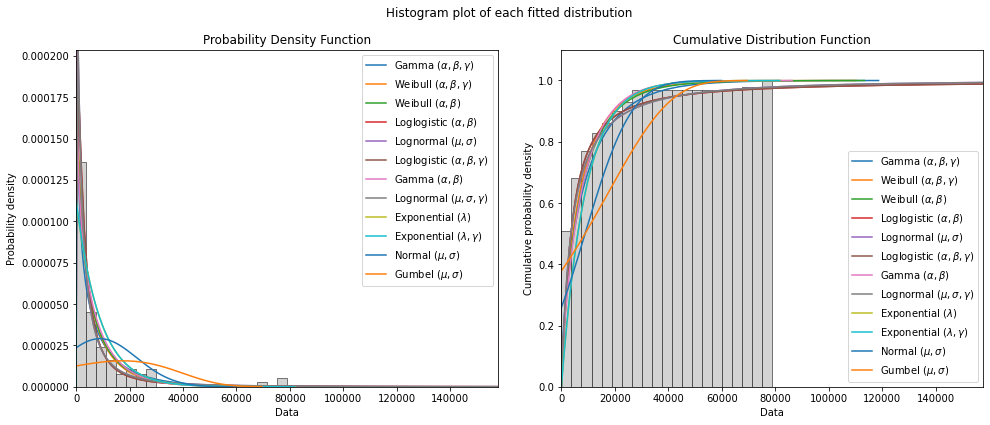

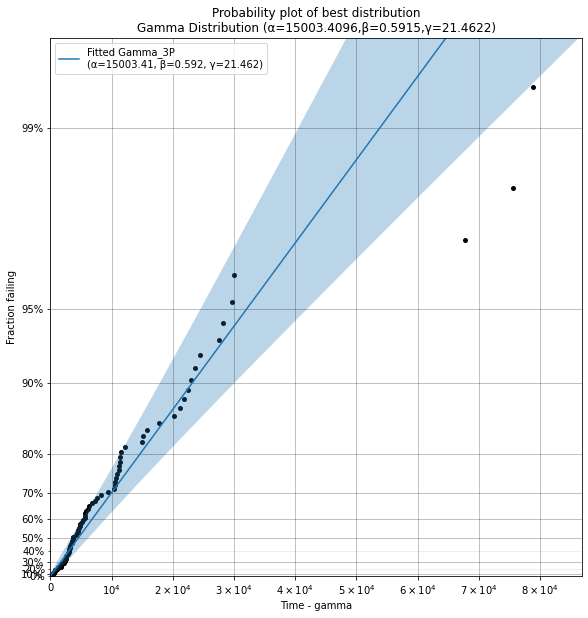

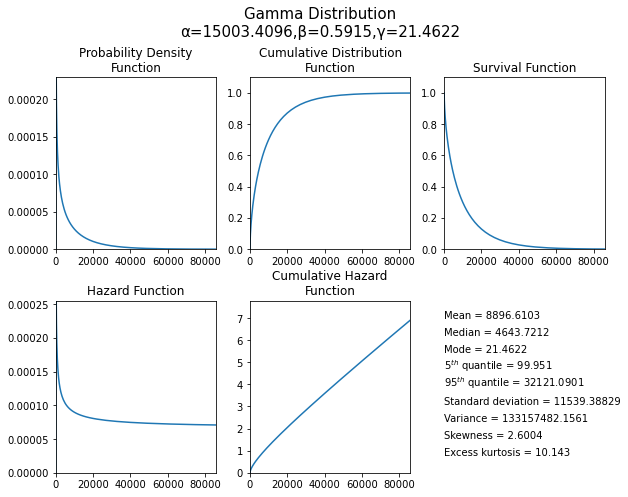

In [838]:
# Fit all probability distributions available from 'reliability' library
output3 = Fit_Everything(failures=sim['means'].dropna().tolist(), show_probability_plot=False, show_PP_plot=False)

# Define the probability distribution that best fitted the failure times for the given component
output3.best_distribution.plot()

In [839]:
output3.best_distribution.mean

8896.610270366942

# Deal size of 20 units

In [840]:
dist_name = output.results.iloc[0][0]
param = output.results.iloc[0][1:7]
param.columns = ['value']
param = param.to_frame()
param.columns = ['value']
param.value = pd.to_numeric(param.value)
param.value = param.value.fillna(0)
param

,value
Alpha,28186.4
Beta,0.28373
Gamma,10.9458
Mu,0
Sigma,0
Lambda,0


In [841]:
if "Weibull" in dist_name:
    print("Weibull_Distribution")
    dist = Weibull_Distribution(alpha=param.iloc[0],beta=param.iloc[1],gamma=param.iloc[2])
elif "Exponential" in dist_name:
    print("Exponential_Distribution")
    dist = Exponential_Distribution(Lambda=param.iloc[5], gamma=param.iloc[2])
elif "Normal" in dist_name:
    print("Normal_Distribution")
    dist = Normal_Distribution(mu=param.iloc[3],sigma=param.iloc[4])
elif "Lognormal" in dist_name:
    print("Lognormal_Distribution")
    dist = Lognormal_Distribution(mu=param.iloc[3], sigma=param.iloc[4], gamma=param.iloc[2])
elif "Gamma" in dist_name:
    print("Gamma_Distribution")
    dist = Gamma_Distribution(alpha=param.iloc[0],beta=param.iloc[1],gamma=param.iloc[2])
elif "Beta" in dist_name:
    print("Beta_Distribution")
    dist = Beta_Distribution(alpha=param.iloc[0],beta=param.iloc[1])
elif "Loglogistic" in dist_name:
    print("Loglogistic_Distribution")
    dist = Loglogistic_Distribution(alpha=param.iloc[0],beta=param.iloc[1],gamma=param.iloc[2])
elif "Gumbel" in dist_name:
    print("Gumbel_Distribution")
    dist = Gumbel_Distribution(mu=param.iloc[3],sigma=param.iloc[4])
else:
    print("Distribution not Found!")

Gamma_Distribution


In [842]:
dist_name,dist

('Gamma_3P', <reliability.Distributions.Gamma_Distribution at 0x1b0381a6640>)

In [843]:
means = []
percentile95 = []
i = 0
while(i<100):
    sample = dist.random_samples(20)
    output = Fit_Gamma_3P(failures=sample,show_probability_plot=False,print_results=False)
    means.append(output.distribution.mean)
    percentile95.append(output.distribution.b95)
    i+=1
sim = pd.DataFrame({'means':means,'percentile95':percentile95})

In [844]:
sim

,means,percentile95
0,7109.36,32518.6
1,12671.1,61840.7
2,3263.65,15499.8
3,10413.1,44018.6
4,3444.12,17824.5
5,16036.5,74879.9
6,5906.27,27915.8
7,3733.74,18519.6
8,6643.84,31788.2
9,5970.22,26182.7


In [845]:
sim.means.mean()

8559.486283176535

Results from Fit_Everything:
Analysis method: MLE
Failures / Right censored: 100/0 (0% right censored) 

   Distribution   Alpha    Beta   Gamma      Mu    Sigma      Lambda  Log-likelihood    AICc     BIC       AD
   Lognormal_2P                         8.92228 0.512364                    -967.255 1938.63 1943.72 0.441921
 Loglogistic_2P 7497.47 3.44551                                             -967.865 1939.85 1944.94 0.364659
   Lognormal_3P                 152.158 8.89887 0.524311                    -967.214 1940.68 1948.24 0.440819
       Gamma_3P 2882.12  2.3483 1736.68                                     -967.345 1940.94 1948.51 0.584907
       Gamma_2P  2176.2 3.93322                                             -969.873 1943.87 1948.96 0.880204
 Loglogistic_3P 6572.32 3.00875 845.298                                     -967.612 1941.47 1949.04 0.348524
     Weibull_3P 7045.89 1.41517 2156.62                                     -967.733 1941.72 1949.28 0.809859
 Exponential_2P

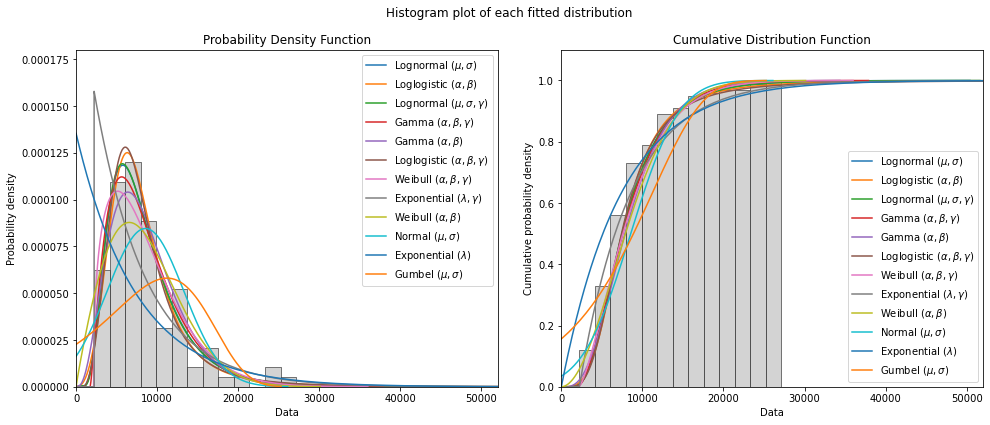

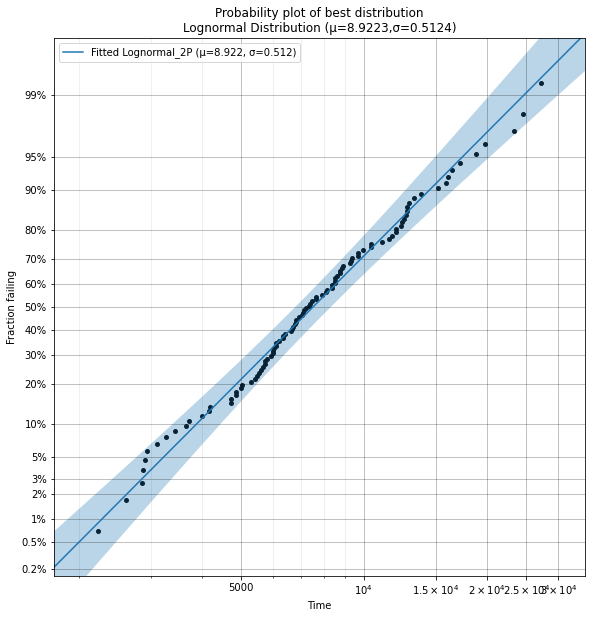

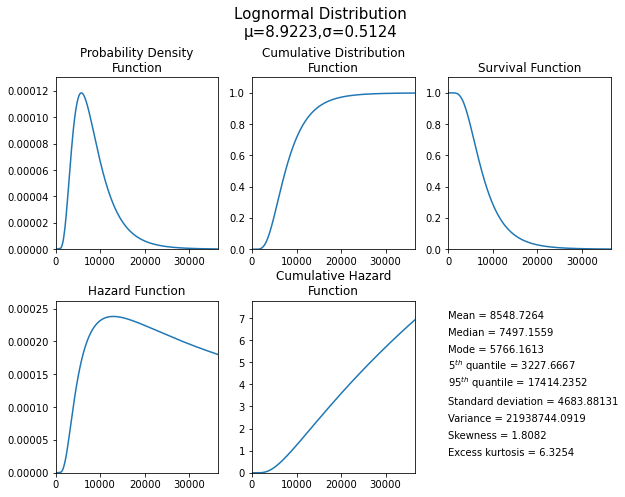

In [846]:
# Fit all probability distributions available from 'reliability' library
output = Fit_Everything(failures=sim['means'].dropna().tolist(), show_probability_plot=False, show_PP_plot=False)

# Define the probability distribution that best fitted the failure times for the given component
output.best_distribution.plot()

In [847]:
output.best_distribution.mean

8548.72640378083

# 1. Actual cost of 1st year standard warranty and failure frequency for each of the 2 model families

MODEL FAMILY "D"

Unit Cost - $3333.08

Failure Frequency - 6




MODEL FAMILY "GR"

Unit Cost - $1120.18

Failure Frequency - 3


# 2. Estimate of 2nd year cost (13 to 24 months in service) for a potential extended warranty FULL (= to standard warranty first year coverage) on a deal of 50 units for model "865"

Extended Warranty Estimates of 50 units - $2123.59

# 3. Estimate of a contract for additional 4 years (13 to 60 months in service) extended warranty FULL (= to standard warranty first year coverage) for models “2050” for both 2 units and 20 units

Extended Warranty Estimates of 2 units - $11736.94

Extended Warranty Estimates of 20 units - $9196.46

# 4. Estimate of a contract for additional 4 years (13 to 60 months in service) extended warranty FULL (= to standard warranty first year coverage) for models “2050” for both 2 units and 20 units, but coverage limited to POWERTRAIN* only - Engine + Turbo + Transmission components

Extended Warranty Estimates of 2 units - $8896.61

Extended Warranty Estimates of 20 units - $8548.73